## 6.1 使用逻辑回归进行二元分类

## 6.2 垃圾邮件过滤

In [1]:
# UCI 机器学习仓库中的 垃圾信息数据集
# https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

代码 6.1

In [2]:
import pandas as pd 
df = pd.read_csv('./SMSSpamCollection', delimiter='\t', header=None) 
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
print('Number of spam messages: %s' % df[df[0] == 'spam'][0].count()) 
print('Number of ham messages: %s' % df[df[0] == 'ham'][0].count())

Number of spam messages: 747
Number of ham messages: 4825


代码 6.2

In [4]:
import numpy as np 
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score 
X = df[1].values 
y = df[0].values 
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y) 
vectorizer = TfidfVectorizer() #TfidfVectorizer是scikit-learn库中的一个类，用于将一组原始的中文文档转换为TF-IDF特征矩阵。
X_train = vectorizer.fit_transform(X_train_raw) 
X_test = vectorizer.transform(X_test_raw) 
classifier = LogisticRegression() 
classifier.fit(X_train, y_train) 
predictions = classifier.predict(X_test) 
for i, prediction in enumerate(predictions[:5]): 
 print('Predicted: %s, message: %s' % (prediction, 
 X_test_raw[i]))

Predicted: ham, message: That's necessarily respectful
Predicted: ham, message: When you just put in the + sign, choose my number and the pin will show. Right?
Predicted: ham, message: So how many days since then?
Predicted: ham, message: Chk in ur belovd ms dict
Predicted: ham, message: I am late. I will be there at


### 6.2.1 二元分类性能指标

代码 6.3

[[4 1]
 [2 3]]


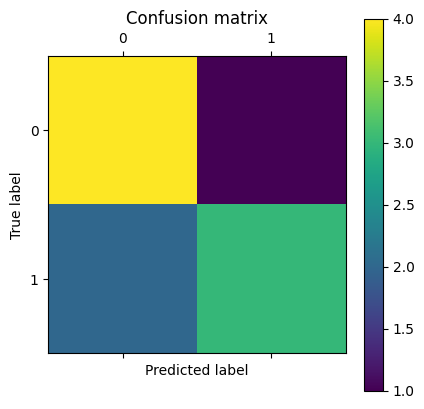

In [5]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1] 
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1] 
confusion_matrix = confusion_matrix(y_test, y_pred) # 计算混淆矩阵
print(confusion_matrix) 
plt.matshow(confusion_matrix) 
plt.title('Confusion matrix') 
plt.colorbar() 
plt.ylabel('True label') 
plt.xlabel('Predicted label') 
plt.show()

### 6.2.2 准确率

In [6]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

df = pd.read_csv('./SMSSpamCollection' ,delimiter='\t',names=['label','message'])
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['message'], df['label'], random_state=11)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
# cross_val_score是scikit-learn库中用于执行交叉验证的函数。它用于对给定的模型进行交叉验证并返回每个验证折叠上的性能评估结果。
# estimator：待评估的机器学习模型对象。
# X：特征数据，通常是一个特征矩阵。
# y：目标数据，通常是一个目标向量。
# cv：指定交叉验证的折叠数量，可以是一个整数或交叉验证迭代器。
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print('Accuracies: %s' % scores)
print('Mean accuracy: %s' % np.mean(scores))

Accuracies: [0.95095694 0.9569378  0.96052632 0.95813397 0.95209581]
Mean accuracy: 0.9557301664613357


### 6.2.3 精准率和召回率

代码 6.5

In [7]:
from sklearn.preprocessing import LabelEncoder
# 创建 LabelEncoder 对象
label_encoder = LabelEncoder()
# 将标签列转换为类别标签
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

precisions = cross_val_score(classifier, X_train, y_train, cv=5,scoring='precision')
print('Precision: %s' % np.mean(precisions))
recalls = cross_val_score(classifier, X_train, y_train, cv=5,scoring='recall')
print('Recall: %s' % np.mean(recalls))

Precision: 0.9898824772775312
Recall: 0.6824561403508772


### 6.2.4 计算 F1 值

代码 6.6

In [8]:
f1s = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1') 
print('F1 score: %s' % np.mean(f1s))

F1 score: 0.8076293446858502


### 6.2.5 ROC AUC

代码 6.7

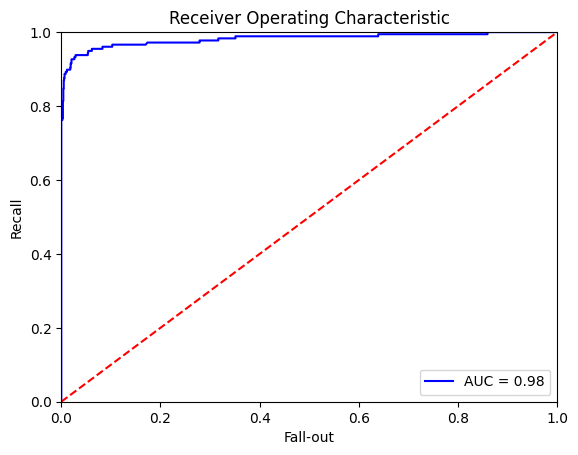

In [9]:
predictions = classifier.predict_proba(X_test)
# roc_curve和auc是scikit-learn库中用于计算接收者操作特征曲线（Receiver Operating Characteristic curve，ROC曲线）和计算曲线下面积（Area Under the Curve，AUC）的函数。
# roc_curve函数用于计算二分类模型的ROC曲线。它接受两个参数：真实标签（y_true）和预测概率（y_score）。以下是roc_curve函数的基本语法：
# y_true：真实的二分类标签。
# y_score：模型的预测概率或决策函数。
# roc_curve函数返回三个数组：
#
# fpr：假阳性率（False Positive Rate）数组，即x轴的值。
# tpr：真阳性率（True Positive Rate）数组，即y轴的值。
# thresholds：分类阈值数组。
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:, 1])
# auc函数用于计算ROC曲线下的面积，即AUC值。以下是auc函数的基本语法：
# 参数说明：
#
# fpr：假阳性率数组。
# tpr：真阳性率数组。
# auc函数返回一个浮点数，表示ROC曲线下的面积。
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' %
 roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

## 6.3 使用网格搜索微调模型

代码 6.8

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score

pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression())
])
parameters = {
    'vect__max_df': (0.25, 0.5, 0.75),
    'vect__stop_words': ('english', None),
    'vect__max_features': (2500, 5000, 10000, None),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'vect__use_idf': (True, False),
    'vect__norm': ['l2'],
    'clf__penalty': ['l2'],
    'clf__C': (0.01, 0.1, 1, 10),
}
df = pd.read_csv('./SMSSpamCollection', delimiter='\t', header=None)
X = df[1].values
y = df[0].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)
# GridSearchCV是scikit-learn库中的一个用于执行网格搜索的类。网格搜索是一种通过穷举搜索指定参数组合来选择最佳模型参数的方法。
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,verbose=1, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)
print('Best score: %0.3f' % grid_search.best_score_)
print('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('t%s: %r' % (param_name, best_parameters[param_name]))
    predictions = grid_search.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, predictions))
    print('Precision:', precision_score(y_test, predictions))
    print('Recall:', recall_score(y_test, predictions))


Fitting 3 folds for each of 384 candidates, totalling 1152 fits
Best score: 0.983
Best parameters set:
tclf__C: 10
Accuracy: 0.9877961234745154
Precision: 0.9935064935064936
Recall: 0.9053254437869822
tclf__penalty: 'l2'
Accuracy: 0.9877961234745154
Precision: 0.9935064935064936
Recall: 0.9053254437869822
tvect__max_df: 0.25
Accuracy: 0.9877961234745154
Precision: 0.9935064935064936
Recall: 0.9053254437869822
tvect__max_features: 2500
Accuracy: 0.9877961234745154
Precision: 0.9935064935064936
Recall: 0.9053254437869822
tvect__ngram_range: (1, 2)
Accuracy: 0.9877961234745154
Precision: 0.9935064935064936
Recall: 0.9053254437869822
tvect__norm: 'l2'
Accuracy: 0.9877961234745154
Precision: 0.9935064935064936
Recall: 0.9053254437869822
tvect__stop_words: None
Accuracy: 0.9877961234745154
Precision: 0.9935064935064936
Recall: 0.9053254437869822
tvect__use_idf: True
Accuracy: 0.9877961234745154
Precision: 0.9935064935064936
Recall: 0.9053254437869822


## 6.4 多类别分类

代码 6.9

In [11]:
# https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data

In [12]:
import pandas as pd 
df = pd.read_csv('./train.tsv', header=0, delimiter='\t') 
df.count()

PhraseId      156060
SentenceId    156060
Phrase        156060
Sentiment     156060
dtype: int64

In [13]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


代码 6.10

In [14]:
df['Phrase'].head(10)

0    A series of escapades demonstrating the adage ...
1    A series of escapades demonstrating the adage ...
2                                             A series
3                                                    A
4                                               series
5    of escapades demonstrating the adage that what...
6                                                   of
7    escapades demonstrating the adage that what is...
8                                            escapades
9    demonstrating the adage that what is good for ...
Name: Phrase, dtype: object

代码 6.11

In [15]:
df['Sentiment'].describe()

count    156060.000000
mean          2.063578
std           0.893832
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: Sentiment, dtype: float64

In [16]:
df['Sentiment'].value_counts()

Sentiment
2    79582
3    32927
1    27273
4     9206
0     7072
Name: count, dtype: int64

In [17]:
df['Sentiment'].value_counts()/df['Sentiment'].count()

Sentiment
2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: count, dtype: float64

代码 6.12

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('./train.tsv', header=0, delimiter='\t')
X, y = df['Phrase'], df['Sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.5)
pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(solver='lbfgs', max_iter=1000))
])
parameters = {
    'vect__max_df': (0.25, 0.5),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'vect__use_idf': (True, False),
    'clf__C': (0.1, 1, 10),
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)
print('Best score: %0.3f' % grid_search.best_score_)
print('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('t%s: %r' % (param_name, best_parameters[param_name]))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best score: 0.625
Best parameters set:
tclf__C: 10
tvect__max_df: 0.25
tvect__ngram_range: (1, 2)
tvect__use_idf: False


### 多类别分类性能衡量指标

代码 6.13

In [19]:
predictions = grid_search.predict(X_test) 
print('Accuracy: %s' % accuracy_score(y_test, predictions)) 
print('Confusion Matrix:') 
print(confusion_matrix(y_test, predictions)) 
print('Classification Report:') 
print(classification_report(y_test, predictions))

Accuracy: 0.6315775983596053
Confusion Matrix:
[[ 1190  1672   579    71     7]
 [ 1041  6130  5977   521    22]
 [  260  3382 31996  3950   171]
 [   37   453  6301  8163  1499]
 [    3    39   465  2298  1803]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.34      0.39      3519
           1       0.53      0.45      0.48     13691
           2       0.71      0.80      0.75     39759
           3       0.54      0.50      0.52     16453
           4       0.51      0.39      0.44      4608

    accuracy                           0.63     78030
   macro avg       0.55      0.50      0.52     78030
weighted avg       0.62      0.63      0.62     78030



## 6.5 多标签分类和问题转换

### 多标签分类性能衡量指标

代码 6.14

In [20]:
import numpy as np 
from sklearn.metrics import hamming_loss, jaccard_score
print(hamming_loss(np.array([[0.0, 1.0], [1.0, 1.0]]), 
 np.array([[0.0, 1.0], 
 [1.0, 1.0]])))

0.0


In [21]:
print(hamming_loss(np.array([[0.0, 1.0], [1.0, 1.0]]), 
 np.array([[1.0, 1.0], 
 [1.0, 1.0]])))

0.25


In [22]:
print(hamming_loss(np.array([[0.0, 1.0], [1.0, 1.0]]), 
 np.array([[1.0, 1.0], 
 [0.0, 1.0]])))

0.5
